# Chi^{2} Testing
The point of this notebook is to do some tests of how to compare an observed image to my simulation images which might be able to tell me how it can better identify the tidal features. This can be done by looking at different methods and their resulting Chi^{2}.

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image_folder = 'C:\\Users\\oryan\\Documents\\chi2-tests\\images\\'
working_folder = 'C:\\Users\\oryan\\Documents\\chi2-tests\\notebooks\\'

### Importing the Images

In [3]:
input_image = np.load(image_folder+'Arp_256.npy')

In [7]:
disk_image = np.load(image_folder+'disk_image_1.npy')

In [8]:
best_image_1 = np.load(image_folder + 'best_image_1.npy')

### Getting Sigma Image

In [9]:
def Sigma_Calc(Input_Image):
    # Artificial Cleaning of Input Image
    Noise_Array = 1e-30*np.random.poisson(10,[Input_Image.shape[0],Input_Image.shape[1]])
    Input_Image_Sigma = Input_Image.copy()
    # Input_Image_Sigma += Noise_Array
    
    h = 6.626e-34
    c = 2.998e8
    wavelength = 467.178
        
    Gain = 4.745
    NCOMBINE = 5
    DARK_VARIANCE = 0.81
        
    # Equation pulled from https://pixinsight.com/doc/tools/FluxCalibration/FluxCalibration.html . Need to generalise.
    ADU = 53.907*(np.pi*(2.5e3**2 - 0.625e3**2)/4)*176.672*0.8*Gain*0.6*1*(wavelength/c/h)
    
    Input_Image_ADU = Input_Image_Sigma*ADU
    
    Input_Image_elec = Input_Image_ADU
    
    sky = Noise_Array*ADU
    sky_rms = np.sqrt(np.mean(sky**2))
            
                
    # This equation has come from an SDSS tutorial, found at: http://classic.sdss.org/dr6/algorithms/fluxcal.html
    Sigma_Counts = np.sqrt(Input_Image_elec**2 + (np.sqrt(NCOMBINE)*sky_rms)**2)
                
    Sigma_ADU = Sigma_Counts/(Gain)
        
    Sigma = Sigma_ADU/(ADU)
    
    Sigma = Sigma.astype('float64')
                        
    return Sigma

In [10]:
Sigma_Image = Sigma_Calc(input_image)

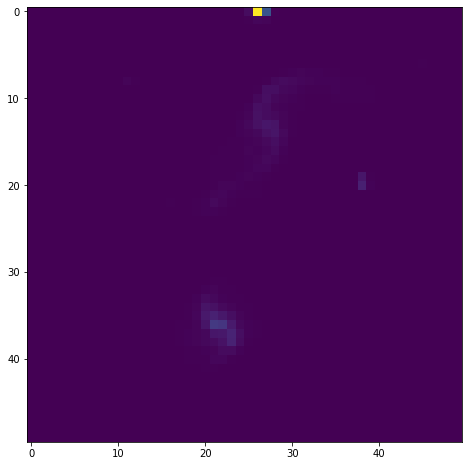

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(Sigma_Image)

### Plotting out the example images

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


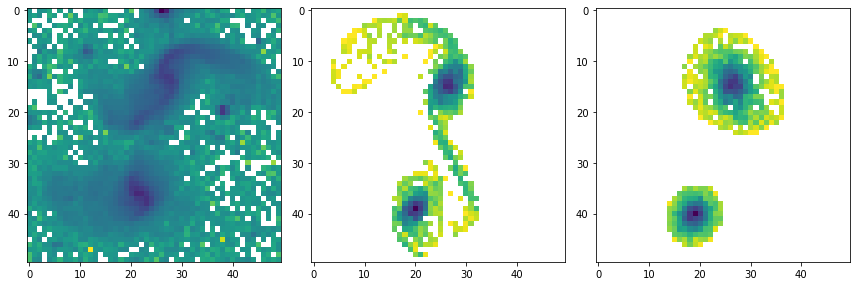

In [15]:
figure,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,8))
axes[0].imshow(-2.5*np.log10(input_image) - 48.6)
axes[1].imshow(-2.5*np.log10(best_image_1) - 48.6)
axes[2].imshow(-2.5*np.log10(disk_image) - 48.6)
figure.tight_layout()

Ok, so, that's something wrong with the simulations... They have tons of holes in them! We need to figure out a way to interpolate them and make them look waaaay more realistic...

### Making realistic simulations

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


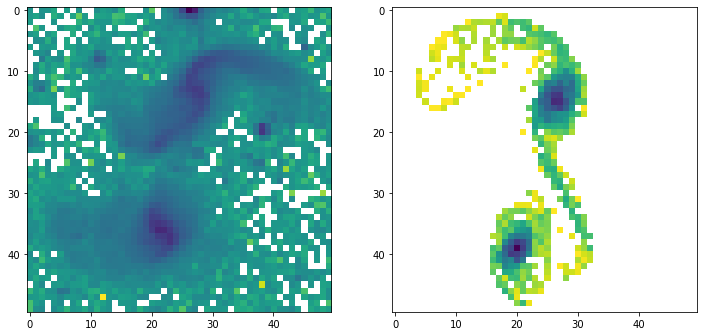

In [23]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(-2.5*np.log10(input_image) - 48.6)
axes[1].imshow(-2.5*np.log10(best_image_1) - 48.6)

In [24]:
int_image = np.zeros(best_image_1.shape)
for i in range(1,best_image_1.shape[0] - 1):
    for j in range(1,best_image_1.shape[1] - 1):
        int_image[i,j] = np.mean(best_image_1[i-1:i+1,j-1:j+1])

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


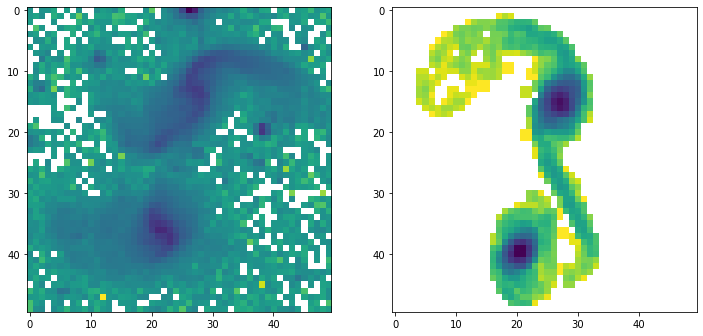

In [25]:
figure,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
axes[0].imshow(-2.5*np.log10(input_image) - 48.6)
axes[1].imshow(-2.5*np.log10(int_image) - 48.6)

### Chi Squared with no 'Interpolation'

In [30]:
Sigma_Array = (input_image - best_image_1)**2/(2*(Sigma_Image)**2)

In [31]:
N = input_image.shape[0]*input_image.shape[1]
Chi_Squared = (1/N)*np.sum(Sigma_Array)
Chi_Squared

18.206931748693687

In [32]:
ln_like = -0.5*Chi_Squared
ln_like

-9.103465874346844

In [33]:
Sigma_Array = (input_image - disk_image)**2/(2*(Sigma_Image)**2)

In [34]:
N = input_image.shape[0]*input_image.shape[1]
Chi_Squared = (1/N)*np.sum(Sigma_Array)
Chi_Squared

48.872496526286454

In [35]:
ln_like = -0.5*Chi_Squared
ln_like

-24.436248263143227

### What Does this do to Chi-Squared?

In [26]:
Sigma_Array = (input_image - int_image)**2/(2*(Sigma_Image)**2)

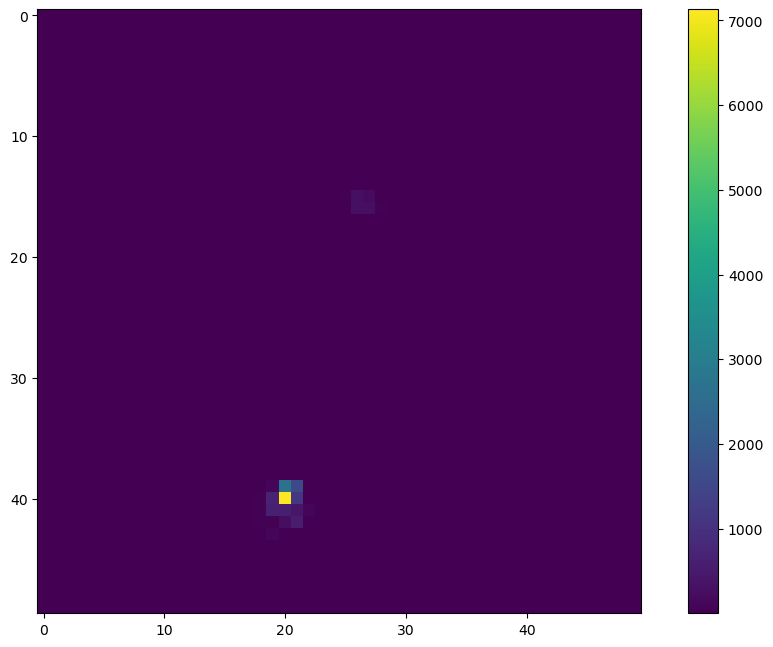

In [27]:
plt.figure(figsize=(12,8),dpi=100)
plt.imshow(Sigma_Array)
plt.colorbar()

In [28]:
N = input_image.shape[0]*input_image.shape[1]
Chi_Squared = (1/N)*np.sum(Sigma_Array)
Chi_Squared

11.820632672026115

In [29]:
ln_like = -0.5*Chi_Squared
ln_like

-5.910316336013057